# **Automatic Account Detection**

Dataset From - https://www.kaggle.com/c/twitter-bot-classification | https://www.kaggle.com/charvijain27/detecting-twitter-bot-data

**Libraries**

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import pickle

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Natural Language Processing
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer= PorterStemmer()
lemmatizer=WordNetLemmatizer()

# Modeling
import sklearn.ensemble
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,roc_curve,auc
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package stopwords to C:\Users\Nishan
[nltk_data]     Chathuranga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Nishan
[nltk_data]     Chathuranga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nishan
[nltk_data]     Chathuranga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
url_bot_train = 'data/Bot/training_data_2_csv_UTF.csv'
df_bot_train = pd.read_csv(url_bot_train)

In [3]:
training_data = df_bot_train

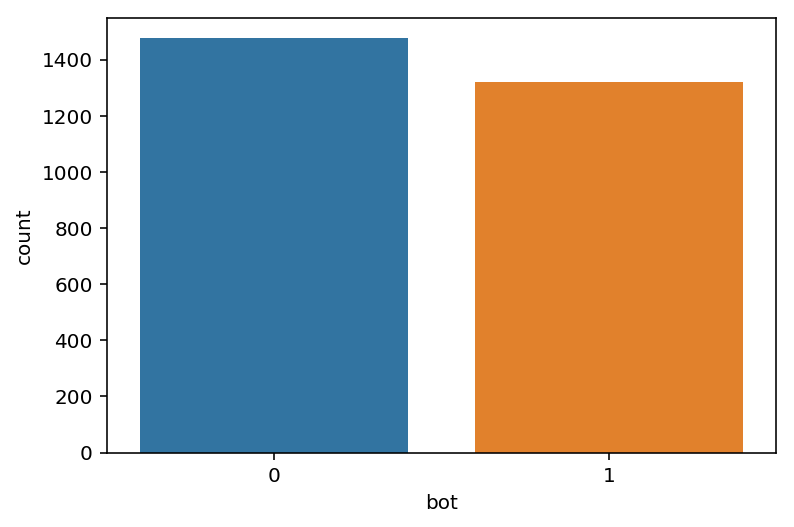

In [4]:
sns.countplot(training_data['bot'])

In [5]:
training_data.apply(lambda x: sum(x.isnull()))

id                          0
id_str                      0
screen_name                 0
location                 1020
description               403
url                      1342
followers_count             0
friends_count               0
listed_count                0
created_at                  0
favourites_count            0
verified                    0
statuses_count              0
lang                        0
status                    289
default_profile             0
default_profile_image       0
has_extended_profile       99
name                        0
bot                         0
dtype: int64

In [6]:
text_cols=training_data[['screen_name','location','description','url','created_at','lang','status','has_extended_profile','name']]
text_cols.head()

,screen_name,location,description,url,created_at,lang,status,has_extended_profile,name
0,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""","""Mon Jan 02 02:25:26 +0000 2017""","""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",False,"""Houston PokŽ Alert"""
1,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,2/1/2016 7:37,en,NaN,False,Keri Nelson
2,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,Fri Nov 20 18:53:22 +0000 2015,en,"{'retweeted': False, 'is_quote_status': False,...",False,Matt Lieber Is Bot
3,sc_papers,NaN,NaN,NaN,2/25/2015 20:11,en,Construction of human anti-tetanus single-chai...,False,single cell papers
4,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,1/1/2015 17:44,en,NaN,False,lucarivera16


In [7]:
text_cols.rename(columns={'screen_name':'screen_name_processed'}, inplace=True)
text_cols.rename(columns={'name':'name_processed'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [8]:
stop_words = set(stopwords.words('english'))

text_cols['screen_name_processed_num_count'] = ""
for index, row in text_cols.iterrows():
    row['screen_name_processed'] = row['screen_name_processed'].lower() #Convert text to lowercase
    row['screen_name_processed_num_count'] = (sum(c.isdigit() for c in row['screen_name_processed'])) #create new column to get number of numbers
    row['screen_name_processed'] = re.sub(r'\d+','', row['screen_name_processed']) #Remove numbers
    row['screen_name_processed']= row['screen_name_processed'].translate(str.maketrans('','',string.punctuation)) #Remove punctuation
    row['screen_name_processed'] = row['screen_name_processed'].strip() #Remove whitespaces
    row['screen_name_processed'] = [i for i in word_tokenize(row['screen_name_processed']) if not i in stop_words] #Tokenization - REMOVE STOP WORDS
    for word in row['screen_name_processed']:
        row['screen_name_processed'] = lemmatizer.lemmatize(word)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
text_cols['name_processed_num_count'] = ""
for index, row in text_cols.iterrows():
    row['name_processed'] = row['name_processed'].lower() #Convert text to lowercase
    row['name_processed_num_count'] = (sum(c.isdigit() for c in row['name_processed'])) #create new column to get number of numbers
    row['name_processed'] = re.sub(r'\d+','', row['name_processed']) #Remove numbers
    row['name_processed']= row['name_processed'].translate(str.maketrans('','',string.punctuation)) #Remove punctuation
    row['name_processed'] = row['name_processed'].strip() #Remove whitespaces
    row['name_processed'] = [i for i in word_tokenize(row['name_processed']) if not i in stop_words] #Tokenization - REMOVE STOP WORDS

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
text_cols.head()

,screen_name_processed,location,description,url,created_at,lang,status,has_extended_profile,name_processed,screen_name_processed_num_count,name_processed_num_count
0,houstonpokemap,"""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""","""Mon Jan 02 02:25:26 +0000 2017""","""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",False,"[houston, pokž, alert]",0,0
1,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,2/1/2016 7:37,en,NaN,False,"[keri, nelson]",0,0
2,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,Fri Nov 20 18:53:22 +0000 2015,en,"{'retweeted': False, 'is_quote_status': False,...",False,"[matt, lieber, bot]",0,0
3,scpapers,NaN,NaN,NaN,2/25/2015 20:11,en,Construction of human anti-tetanus single-chai...,False,"[single, cell, papers]",0,0
4,lucarivera,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,1/1/2015 17:44,en,NaN,False,[lucarivera],2,2


In [11]:
def impute_na(variable):
    for i, row in text_cols[text_cols[variable].isnull()].iterrows():
        obs_sample = text_cols[variable].dropna().sample(1, random_state=int(row.screen_name_processed_num_count))
        obs_sample.index = [i]
        text_cols.at[i, variable] = obs_sample

In [12]:
impute_na('has_extended_profile')

In [13]:
word_list = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'

In [14]:
listofwords = pickle.load(open("model/words_in_not_credible.pickle", 'rb'))

In [15]:
listofwords2 = pickle.load(open("model/word_couples_in_not_credible.pickle", 'rb'))

In [16]:
list_ofwords=list(listofwords)
str1 = '|'.join(str(e) for e in list_ofwords)

In [17]:
list_ofwords2=list(listofwords2)
str2 = '|'.join(str(e) for e in list_ofwords2)

In [18]:
text_cols['screen_name_binary'] = training_data.screen_name.str.contains(word_list, case=False, na=False)
text_cols['name_binary'] = training_data.name.str.contains(word_list, case=False, na=False)
text_cols['description_binary'] = training_data.description.str.contains(word_list, case=False, na=False)
text_cols['status_binary'] = training_data.status.str.contains(word_list, case=False, na=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [19]:
word_list = str1 + '|' + str2 + '|' + word_list

In [20]:
text_cols['listed_count_binary'] = (training_data.listed_count>20000)==False

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
for column in training_data:
    text_cols[column+'_NA'] = np.where(training_data[column].isnull(), 1, 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
NA_cols = [col for col in text_cols.columns if 'NA' in col]
NA_cols

['id_NA',
 'id_str_NA',
 'screen_name_NA',
 'location_NA',
 'description_NA',
 'url_NA',
 'followers_count_NA',
 'friends_count_NA',
 'listed_count_NA',
 'created_at_NA',
 'favourites_count_NA',
 'verified_NA',
 'statuses_count_NA',
 'lang_NA',
 'status_NA',
 'default_profile_NA',
 'default_profile_image_NA',
 'has_extended_profile_NA',
 'name_NA',
 'bot_NA']

In [23]:
text_cols.has_extended_profile = text_cols.has_extended_profile.astype(int)

In [24]:
text_cols.rename(columns={'has_extended_profile':'has_extended_profile_processed'}, inplace=True)

In [25]:
training_data['des_hashtags'] = training_data['description'].str.count('#')
training_data['des_mentions'] = training_data['description'].str.count('@')
training_data['des_length'] = training_data['description'].str.len()
training_data['status_hashtags'] = training_data['status'].str.count('#')
training_data['status_mentions'] = training_data['status'].str.count('@')
training_data['status_length'] = training_data['status'].str.len()
training_data['des_link_count'] = training_data['description'].str.count(':')

training_data['status_punctuation'] = training_data['status'].str.count('\.')
training_data['des_punctuation'] = training_data['description'].str.count('\.')
training_data['status_quote'] = training_data['status'].str.count('"')
training_data['des_quote'] = training_data['description'].str.count('"')

In [26]:
text_cols_features = text_cols[['has_extended_profile_processed','name_processed_num_count','screen_name_processed_num_count','screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'listed_count_binary','location_NA','description_NA','url_NA','status_NA','has_extended_profile_NA']].copy()
training_data_features = training_data[['verified', 'followers_count', 'friends_count', 'statuses_count','bot']].copy()
feature_set = training_data[['status_punctuation','des_punctuation','status_quote','des_quote','des_link_count','des_hashtags', 'des_mentions', 'des_length', 'status_hashtags','status_mentions','status_length']].copy().fillna(0)

In [27]:
feature_set.head(100)

,status_punctuation,des_punctuation,status_quote,des_quote,des_link_count,des_hashtags,des_mentions,des_length,status_hashtags,status_mentions,status_length
0,17.0,2.0,96.0,2.0,1.0,0.0,0.0,85.0,2.0,0.0,1598.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,139.0,0.0,0.0,0.0
2,1.0,0.0,4.0,0.0,0.0,0.0,3.0,124.0,0.0,0.0,721.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,0.0,4.0,0.0,90.0,1.0,0.0,134.0
96,2.0,4.0,6.0,0.0,0.0,0.0,2.0,109.0,0.0,2.0,945.0
97,116.0,0.0,12.0,0.0,0.0,12.0,0.0,89.0,23.0,2.0,12377.0
98,84.0,0.0,716.0,0.0,0.0,0.0,0.0,23.0,0.0,9.0,5991.0


In [28]:
result = pd.concat([feature_set,text_cols_features, training_data_features], axis=1, sort=False)
result.to_csv('data/Bot/processed.csv', index=False)

In [29]:
mask_on = training_data['bot'] == 1
training_data_bot_description = training_data[mask_on]['description']

# Instantiate a CountVectorizer
cv1 = CountVectorizer(stop_words = 'english')

# Fit and transform the vectorizer on our corpus
bot_cvec = cv1.fit_transform(training_data_bot_description.values.astype('U'))

# Convert onion_cvec into a DataFrame
bot_cvec_df = pd.DataFrame(bot_cvec.toarray(),
                   columns=cv1.get_feature_names())

# Inspect head of Onion Titles cvec
print(bot_cvec_df.shape)

(1321, 4638)


In [30]:
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Enable bar values
    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

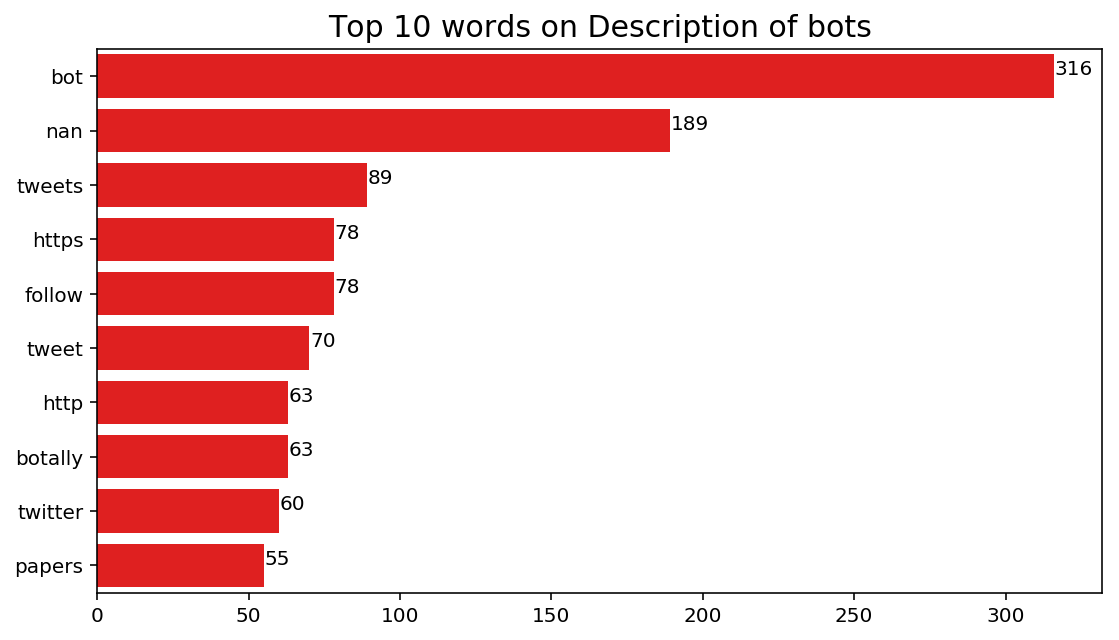

In [31]:
bot_wc = bot_cvec_df.sum(axis = 0)
bot_top_10 = bot_wc.sort_values(ascending=False).head(10)

# Call function
bar_plot(bot_top_10.values, bot_top_10.index, 'Top 10 words on Description of bots','r') 

In [32]:
result_no_f = training_data_features
training_result_no_f = result_no_f.drop('bot', axis=1)
X = training_result_no_f.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, result_no_f.bot, test_size=0.3,
                                                    random_state=0)
ovrsmple = SMOTE(ratio='minority')
X_train, y_train = ovrsmple.fit_sample(X_train, y_train)
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=500,
                                              min_samples_split=5,
                                              criterion='gini', 
                                              max_features='auto',
                                              max_depth = 8,
                                              oob_score=True,
                                              random_state=42,
                                              n_jobs=-1)
rfc.fit(X_train, y_train)

print('Random Forest Classifier Train Accuracy Score :', rfc.score(X_train, y_train))
print('Random Forest Classifier Test Score :', rfc.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Classifier Train Accuracy Score : 0.9241114313160422
Random Forest Classifier Test Score : 0.8678571428571429


In [33]:
training = result.drop('bot', axis=1)
X = training.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, result.bot, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1957, 28), (840, 28))

In [35]:
ovrsmple = SMOTE(ratio='minority')

X_train, y_train = ovrsmple.fit_sample(X_train, y_train)

In [36]:
np.bincount(y_train)

array([1041, 1041], dtype=int64)

In [37]:
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=500,
                                              min_samples_split=5,
                                              criterion='gini', 
                                              max_features='auto',
                                              max_depth = 8,
                                              oob_score=True,
                                              random_state=42,
                                              n_jobs=-1)

In [38]:
rfc.fit(X_train, y_train)

print('Random Forest Classifier Train Accuracy Score :', rfc.score(X_train, y_train))
print('Random Forest Classifier Test Score :', rfc.score(X_test, y_test))

Random Forest Classifier Train Accuracy Score : 0.9385206532180596
Random Forest Classifier Test Score : 0.8916666666666667


In [39]:
from sklearn.metrics import classification_report
predt = rfc.predict(X_test)
report = classification_report(y_test, predt)
print(report)

             precision    recall  f1-score   support

          0       0.88      0.92      0.90       435
          1       0.91      0.86      0.88       405

avg / total       0.89      0.89      0.89       840



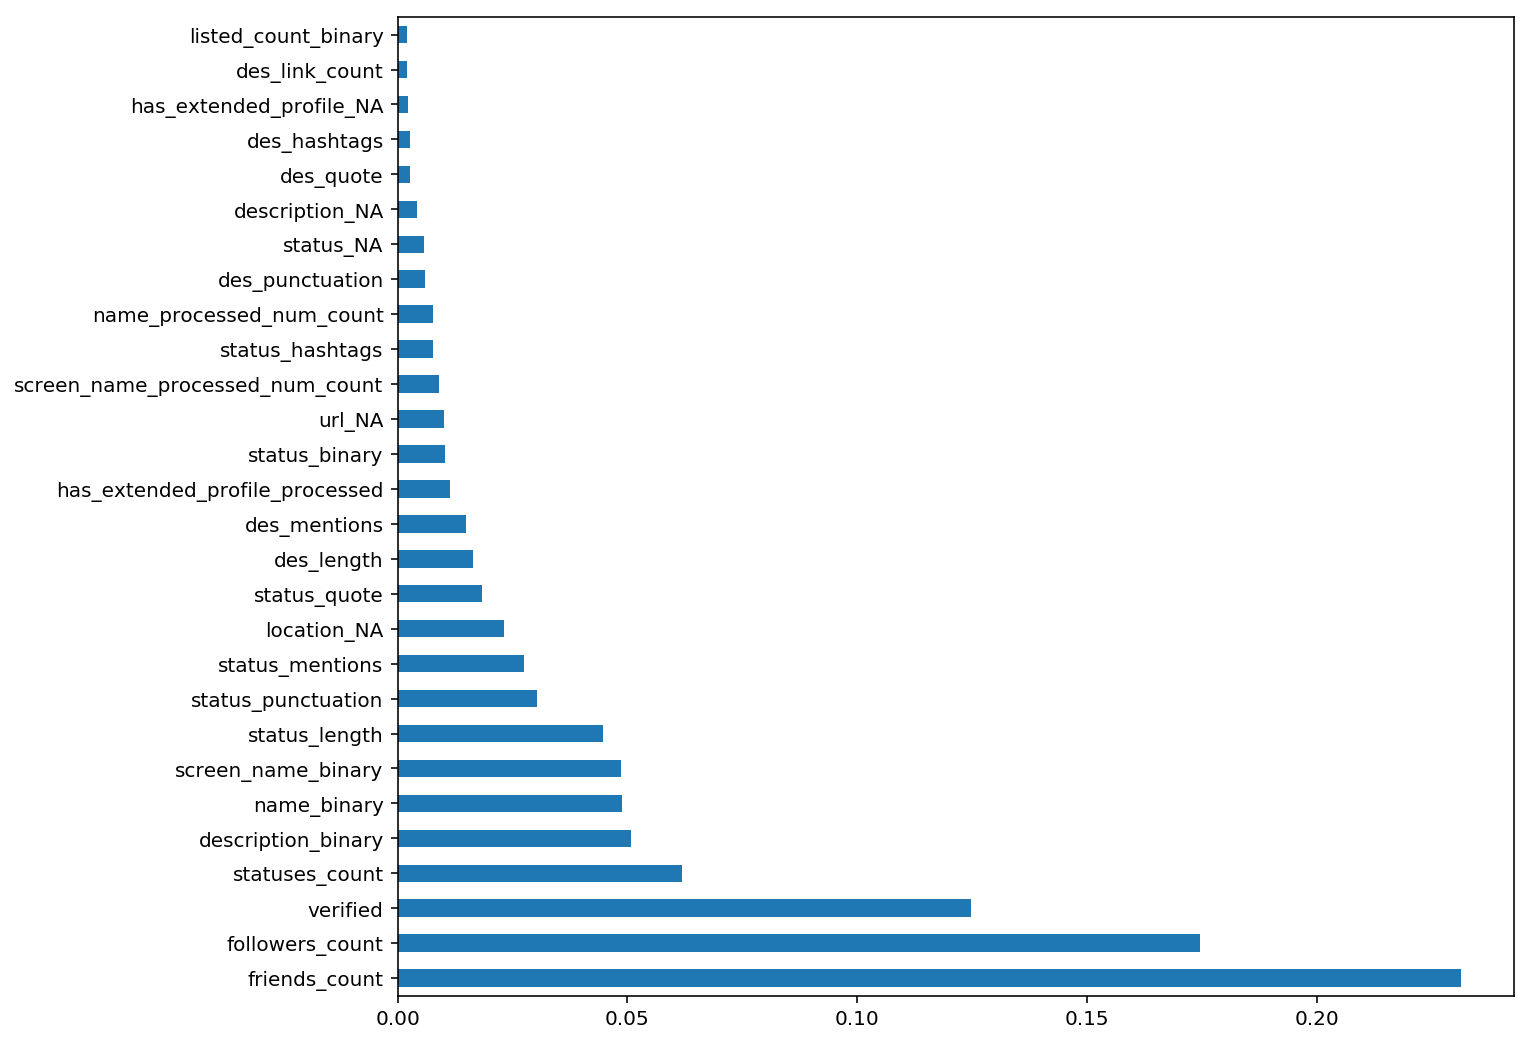

In [40]:
plt.figure(figsize=(10,9))
feat_importances = pd.Series(rfc.feature_importances_, index=training.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier(criterion='gini',
                            max_depth = 10,
                            max_features = 'auto',
                            random_state = 1,
                            splitter = 'best')

In [43]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [44]:
print("Train Score :", dtc.score(X_train, y_train))
print("Test Score :", dtc.score(X_test, y_test))

Train Score : 0.9385206532180596
Test Score : 0.8357142857142857


In [45]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression

ss = StandardScaler()
X_train_s= ss.fit_transform(X_train) # saved the mean and std from X_train
X_test_s=ss.transform(X_test)


# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

#initialize grid search and Logistic regression

lr = LogisticRegression(n_jobs=-1)
# clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)
# # Train the model using the training sets
# clf.fit(X_train_s, y_train)

lr.fit(X_train_s, y_train)
lr_y_pred = lr.predict(X_test_s)
print("LR train score :")
print(lr.score(X_train_s, y_train))
print('')
print("LR test score  :")

print(lr.score(X_test_s, y_test))

LR train score :
0.8054755043227666

LR test score  :
0.7988095238095239


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


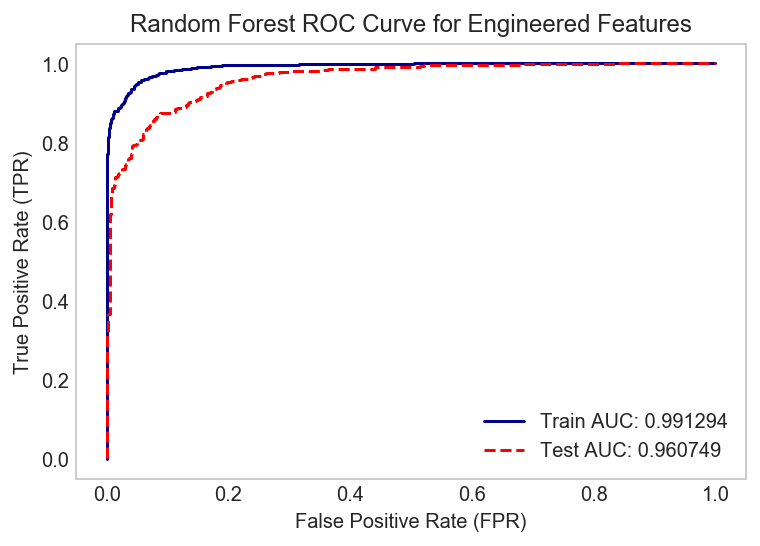

In [46]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = rfc.predict_proba(X_train)
scores_test = rfc.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random Forest ROC Curve for Engineered Features")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

In [47]:
labels=['bot','human']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.YlOrRd):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

Confusion matrix
[[400  35]
 [ 56 349]]


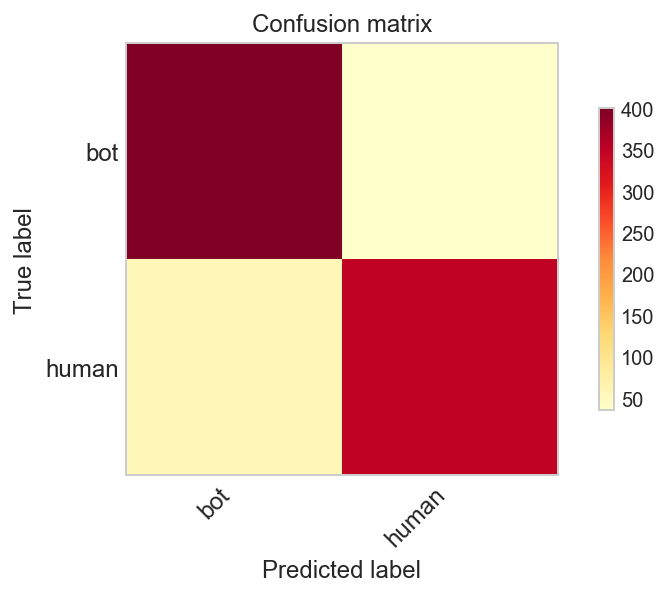

In [48]:
# Create the predictions for Y training data
preds = rfc.predict(X_test)
cm = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

In [49]:
# Assign True Neg, False Pos, False Neg, True Pos variables
cnf_matrix = np.array(cm).tolist()

tn_fp, fn_tp = cm

tn, fp = tn_fp
fn, tp = fn_tp

In [50]:
# Print Scores 
print("Accuracy:",round(metrics.accuracy_score(y_test, preds)*100, 2),'%')
print("Precision:",round(metrics.precision_score(y_test, preds)*100, 2), '%')
print("Recall:",round(metrics.recall_score(y_test, preds)*100, 2), '%')
print("Specificity:", round((tn/(tn+fp))*100, 2), '%')
print("Misclassification Rate:", round((fp+fn)/(tn+fp+fn+tn)*100, 2), '%')

Accuracy: 89.17 %
Precision: 90.89 %
Recall: 86.17 %
Specificity: 91.95 %
Misclassification Rate: 10.21 %


In [51]:
pickle.dump(rfc, open("model/model_bot.pickle", "wb"))

In [52]:
model = pickle.load(open("model/model_bot.pickle", 'rb'))

In [53]:
result.head(1)

,status_punctuation,des_punctuation,status_quote,des_quote,des_link_count,des_hashtags,des_mentions,des_length,status_hashtags,status_mentions,...,location_NA,description_NA,url_NA,status_NA,has_extended_profile_NA,verified,followers_count,friends_count,statuses_count,bot
0,17.0,2.0,96.0,2.0,1.0,0.0,0.0,85.0,2.0,0.0,...,0,0,0,0,0,False,1291,0,78554,1


In [54]:
url_bot_test = 'data/Bot/test_data_4_students.csv'
df_bot_test = pd.read_csv(url_bot_test,sep='\t', encoding = "ISO-8859-1",nrows=4)

In [55]:
text_cols2=df_bot_test[['screen_name','location','description','url','created_at','lang','status','has_extended_profile','name']].copy()
text_cols2.head()

,screen_name,location,description,url,created_at,lang,status,has_extended_profile,name
0,__keating,brooklyn,lgbt editor at @buzzfeed. shannon.keating@buzz...,https://t.co/QneJmYRyhj,Tue Jan 07 23:26:52 +0000 2014,en,{'created_at': 'Tue Apr 11 15:31:51 +0000 2017...,False,shannon keating
1,_callme_Dani,"Los Angeles, CA",News Curation Editor @BuzzFeedNews \rI do a lo...,NaN,Fri Feb 14 19:45:56 +0000 2014,en,{'created_at': 'Tue Apr 11 00:56:02 +0000 2017...,False,Danielle Hopkins
2,_little_britt_,NaN,Family comes first! Also I am in love with piz...,https://t.co/E7DE1cJB7e,8/18/2012 15:13,en,"{'place': None, 'retweeted': False, 'favorited...",True,Brittney Smith
3,134k5,NaN,@BuzzFeedJapan   @cnet_japan / DMÐÜã_...,https://t.co/Cbguzs2PjT,Sun Jan 17 07:11:45 +0000 2016,ja,{'created_at': 'Sat Apr 08 08:41:08 +0000 2017...,True,Keigo Isashi


In [56]:
screen_name = "Nishan_CW"
location = "Western Sri Lanka"
description = "Social Innovator | System Designer | Realist | Humanitarian"
url = "https://t.co/zW9UUFzeWa"
created_at = "Mon Sep 19 04:59:39 +0000 2011"
lang = ""
status = "{ 'created_at': 'Wed Jan 08 12:34:56 +0000 2020', 'id': 1214888214726496300, 'id_str': '1214888214726496256', 'text': 'Advances in neural networks and other techniques promise to transform health care while raising profound questions… https://t.co/AWcRAgOXKM', 'truncated': true, 'entities': { 'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [ { 'url': 'https://t.co/AWcRAgOXKM', 'expanded_url': 'https://twitter.com/i/web/status/1214888214726496256', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [ 116, 139 ] } ] }, 'source': '<a href='http://twitter.com/download/android' rel='nofollow'>Twitter for Android</a>', 'in_reply_to_status_id': null, 'in_reply_to_status_id_str': null, 'in_reply_to_user_id': null, 'in_reply_to_user_id_str': null, 'in_reply_to_screen_name': null, 'geo': null, 'coordinates': null, 'place': { 'id': '173c2bb9d42baaa5', 'url': 'https://api.twitter.com/1.1/geo/id/173c2bb9d42baaa5.json', 'place_type': 'country', 'name': 'Sri Lanka', 'full_name': 'Sri Lanka', 'country_code': 'LK', 'country': 'Sri Lanka', 'contained_within': [], 'bounding_box': { 'type': 'Polygon', 'coordinates': [ [ [ 79.6505263, 5.9213829 ], [ 81.8787816, 5.9213829 ], [ 81.8787816, 9.8359375 ], [ 79.6505263, 9.8359375 ] ] ] }, 'attributes': {} }, 'contributors': null, 'is_quote_status': false, 'retweet_count': 0, 'favorite_count': 0, 'favorited': false, 'retweeted': false, 'possibly_sensitive': false, 'lang': 'en' }""{ 'created_at': 'Wed Jan 08 12:34:56 +0000 2020', 'id': 1214888214726496300, 'id_str': '1214888214726496256', 'text': 'Advances in neural networks and other techniques promise to transform health care while raising profound questions… https://t.co/AWcRAgOXKM', 'truncated': true, 'entities': { 'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [ { 'url': 'https://t.co/AWcRAgOXKM', 'expanded_url': 'https://twitter.com/i/web/status/1214888214726496256', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [ 116, 139 ] } ] }, 'source': '<a href='http://twitter.com/download/android' rel='nofollow'>Twitter for Android</a>', 'in_reply_to_status_id': null, 'in_reply_to_status_id_str': null, 'in_reply_to_user_id': null, 'in_reply_to_user_id_str': null, 'in_reply_to_screen_name': null, 'geo': null, 'coordinates': null, 'place': { 'id': '173c2bb9d42baaa5', 'url': 'https://api.twitter.com/1.1/geo/id/173c2bb9d42baaa5.json', 'place_type': 'country', 'name': 'Sri Lanka', 'full_name': 'Sri Lanka', 'country_code': 'LK', 'country': 'Sri Lanka', 'contained_within': [], 'bounding_box': { 'type': 'Polygon', 'coordinates': [ [ [ 79.6505263, 5.9213829 ], [ 81.8787816, 5.9213829 ], [ 81.8787816, 9.8359375 ], [ 79.6505263, 9.8359375 ] ] ] }, 'attributes': {} }, 'contributors': null, 'is_quote_status': false, 'retweet_count': 0, 'favorite_count': 0, 'favorited': false, 'retweeted': false, 'possibly_sensitive': false, 'lang': 'en' }"
has_extended_profile = True
name = "Nishan Chathuranga"
verified = False
followers_count = 248
friends_count = 167
statuses_count = 2560
listed_count = 6

In [57]:
df_bot_test = pd.DataFrame(columns=["screen_name", "location", "description","url","created_at","lang","status","has_extended_profile","name","verified","followers_count","friends_count","statuses_count","listed_count"], data=[[screen_name, location, description, url, created_at,lang,status,has_extended_profile,name,verified,followers_count,friends_count, statuses_count,listed_count]])

In [58]:
df_bot_test

,screen_name,location,description,url,created_at,lang,status,has_extended_profile,name,verified,followers_count,friends_count,statuses_count,listed_count
0,Nishan_CW,Western Sri Lanka,Social Innovator | System Designer | Realist |...,https://t.co/zW9UUFzeWa,Mon Sep 19 04:59:39 +0000 2011,,{ 'created_at': 'Wed Jan 08 12:34:56 +0000 202...,True,Nishan Chathuranga,False,248,167,2560,6


In [59]:
text_cols2=df_bot_test[['screen_name','location','description','url','created_at','lang','status','has_extended_profile','name']].copy()
text_cols2.head()

,screen_name,location,description,url,created_at,lang,status,has_extended_profile,name
0,Nishan_CW,Western Sri Lanka,Social Innovator | System Designer | Realist |...,https://t.co/zW9UUFzeWa,Mon Sep 19 04:59:39 +0000 2011,,{ 'created_at': 'Wed Jan 08 12:34:56 +0000 202...,True,Nishan Chathuranga


In [60]:
point = []

In [61]:
text_cols2.rename(columns={'screen_name':'screen_name_processed'}, inplace=True)
text_cols2.rename(columns={'name':'name_processed'}, inplace=True)

In [62]:
def convert1(variable):
    stop_words = set(stopwords.words('english'))
    text_cols2[variable+'_processed_num_count'] = ""
    for i, row1 in text_cols2.iterrows():
        row1[variable+'_processed'] = row1[variable+'_processed'].lower() #Convert text to lowercase
        row1[variable+'_processed_num_count'] = sum(ch.isdigit() for ch in row1[variable+'_processed']) #create new column to get number of numbers
        row1[variable+'_processed'] = re.sub(r'\d+','', row1[variable+'_processed']) #Remove numbers
        row1[variable+'_processed']= row1[variable+'_processed'].translate(str.maketrans('','',string.punctuation)) #Remove punctuation
        row1[variable+'_processed'] = row1[variable+'_processed'].strip() #Remove whitespaces
        row1[variable+'_processed'] = [i for i in word_tokenize(row1[variable+'_processed']) if not i in stop_words] #Tokenization - REMOVE STOP WORDS
        for word in row1[variable+'_processed']:
            row1[variable+'_processed'] = lemmatizer.lemmatize(word)
        text_cols2.at[i, 'screen_name_processed'] = row1['screen_name_processed']
        text_cols2.at[i, 'screen_name_processed_num_count'] = row1['screen_name_processed_num_count']

In [63]:
text_cols2.head(4)

,screen_name_processed,location,description,url,created_at,lang,status,has_extended_profile,name_processed
0,Nishan_CW,Western Sri Lanka,Social Innovator | System Designer | Realist |...,https://t.co/zW9UUFzeWa,Mon Sep 19 04:59:39 +0000 2011,,{ 'created_at': 'Wed Jan 08 12:34:56 +0000 202...,True,Nishan Chathuranga


In [64]:
convert1('screen_name')

In [65]:
text_cols2['name_processed_num_count'] = ""
for index, row in text_cols2.iterrows():
    row['name_processed'] = row['name_processed'].lower() #Convert text to lowercase
    row['name_processed_num_count'] = (sum(c.isdigit() for c in row['name_processed'])) #create new column to get number of numbers
    row['name_processed'] = re.sub(r'\d+','', row['name_processed']) #Remove numbers
    row['name_processed']= row['name_processed'].translate(str.maketrans('','',string.punctuation)) #Remove punctuation
    row['name_processed'] = row['name_processed'].strip() #Remove whitespaces
    row['name_processed'] = [i for i in word_tokenize(row['name_processed']) if not i in stop_words] #Tokenization - REMOVE STOP WORDS
    text_cols2.at[index, 'name_processed'] = row['name_processed']
    text_cols2.at[index, 'name_processed_num_count'] = row['name_processed_num_count']

In [66]:
text_cols2.head()

,screen_name_processed,location,description,url,created_at,lang,status,has_extended_profile,name_processed,screen_name_processed_num_count,name_processed_num_count
0,nishancw,Western Sri Lanka,Social Innovator | System Designer | Realist |...,https://t.co/zW9UUFzeWa,Mon Sep 19 04:59:39 +0000 2011,,{ 'created_at': 'Wed Jan 08 12:34:56 +0000 202...,True,"[nishan, chathuranga]",0,0


In [67]:
word_list = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'

In [68]:
listofwords = pickle.load(open("model/words_in_not_credible.pickle", 'rb'))
listofwords2 = pickle.load(open("model/word_couples_in_not_credible.pickle", 'rb'))
list_ofwords=list(listofwords)
str1 = '|'.join(str(e) for e in list_ofwords)
list_ofwords2=list(listofwords2)
str2 = '|'.join(str(e) for e in list_ofwords2)
word_list = str1 + '|' + str2 + '|' + word_list
word_list

'ban|game|san|amp|tech|arrested|https|won|teen|st|showbiz|order|rt|ex|topnews|immigration|cleveland|county|2015|money|politics|want|charged|sanjose|judge|win|business|baltimore|kansas|gun|sports|need|gets|open|black|local|don|entertainment|newyork|chicago|health|crime|rt chrixmorgan|police investigating|attorney general|city council|airport https|game sports|celebs news|bay area|blacktolive https|los angeles|immigration order|man accused|white sox|college football|anti trump|local news|trump immigration|rt giselleevns|rt danageezus|say https|cleveland politics|world cup|chicago news|politics news|trump order|cleveland news|north dakota|shooting https|man charged|news https|protest trump|rt bleepthepolice|rt trayneshacole|local sandiego|climate change|blacklivesmatter https|super bowl|news kansas|america https|trump travel|man killed|pleads guilty|pay wall|police chief|san francisco|australian open|man shot|st louis|travel ban|syria https|police blotter|rt gloed_up|breaking trump|rt and

In [69]:
text_cols2['screen_name_binary'] = df_bot_test.screen_name.str.contains(word_list, case=False, na=False)
text_cols2['name_binary'] = df_bot_test.name.str.contains(word_list, case=False, na=False)
text_cols2['description_binary'] = df_bot_test.description.str.contains(word_list, case=False, na=False)
text_cols2['status_binary'] = df_bot_test.status.str.contains(word_list, case=False, na=False)

In [70]:
text_cols2['listed_count_binary'] = (df_bot_test.listed_count>20000)==False

In [71]:
for column in df_bot_test:
    text_cols2[column+'_NA'] = np.where(df_bot_test[column].isnull(), 1, 0)

In [72]:
def impute_na(variable):
    for i, row in text_cols2[text_cols2[variable].isnull()].iterrows():
        obs_sample = text_cols2[variable].dropna().sample(1, random_state=int(row.screen_name_processed_num_count))
        obs_sample.index = [i]
        text_cols2.at[i, variable] = obs_sample

impute_na('has_extended_profile')

In [73]:
text_cols2['has_extended_profile'].head(20)

0    True
Name: has_extended_profile, dtype: bool

In [74]:
text_cols2.has_extended_profile = text_cols2.has_extended_profile.astype(int)

In [75]:
df_bot_test['des_hashtags'] = df_bot_test['description'].str.count('#')
df_bot_test['des_mentions'] = df_bot_test['description'].str.count('@')
df_bot_test['des_length'] = df_bot_test['description'].str.len()
df_bot_test['status_hashtags'] = df_bot_test['status'].str.count('#')
df_bot_test['status_mentions'] = df_bot_test['status'].str.count('@')
df_bot_test['status_length'] = df_bot_test['status'].str.len()
df_bot_test['des_link_count'] = df_bot_test['description'].str.count(':')

df_bot_test['status_punctuation'] = df_bot_test['status'].str.count('\.')
df_bot_test['des_punctuation'] = df_bot_test['description'].str.count('\.')
df_bot_test['status_quote'] = df_bot_test['status'].str.count('"')
df_bot_test['des_quote'] = df_bot_test['description'].str.count('"')

In [76]:
feature_set = df_bot_test[['status_punctuation','des_punctuation','status_quote','des_quote','des_link_count','des_hashtags', 'des_mentions', 'des_length', 'status_hashtags','status_mentions','status_length']].copy().fillna(0)

In [77]:
text_cols2.rename(columns={'has_extended_profile':'has_extended_profile_processed'}, inplace=True)
text_cols_features = text_cols2[['has_extended_profile_processed','name_processed_num_count','screen_name_processed_num_count','screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'listed_count_binary','location_NA','description_NA','url_NA','status_NA','has_extended_profile_NA']].copy()
test_data_features = df_bot_test[['verified', 'followers_count', 'friends_count', 'statuses_count']].copy()

result = pd.concat([feature_set,text_cols_features, test_data_features], axis=1, sort=False)

In [78]:
point = result.head(1).to_numpy()

In [79]:
# point = [1, 0, 0, False, False, True, False, True, 0, 0, 0, 0, 0, True,
#        1541514, 68, 14230]

In [80]:
point

array([[34, 0, 0, 0, 0, 0, 0, 59, 0, 0, 2884, 1, 0, 0, False, False,
        True, True, True, 0, 0, 0, 0, 0, False, 248, 167, 2560]],
      dtype=object)

In [81]:
# pred = model.predict(np.asarray(point).reshape(1, -1))
# pred[0]
pred = model.predict(point.reshape(1, -1))
pred[0]

0